## Business Objectives: Many house holders don't have a sense of what's a reasonable price for a specific house, and they don't have the ability to distinguish whether a house is over-priced. In addition, many house agents don't have the capability to set a reasonable price. This project can help predict the housing price, thus provide a tool for the price negotiation.

resources: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

# data ingestion

In [101]:
import pandas as pd
import numpy as np

In [102]:
price = pd.read_csv("house_price.csv")
price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# exploratory data analysis and visualization

## univariate analysis

In [103]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [104]:
price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,730.50,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,421.61,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,365.75,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,730.50,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,1095.25,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,1460.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [105]:
# Describing all the Categorical Features
price.describe(include=['O', 'Bool'])

/Users/guangchengyu/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/common.py:1874: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  npdtype = np.dtype(dtype)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='once')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

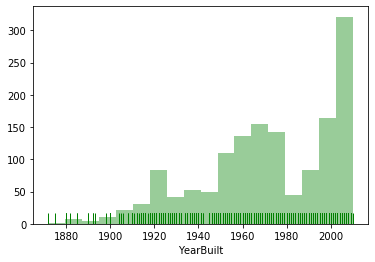

In [107]:
sns.distplot(price.YearBuilt, color = 'green', kde=False, rug=True)

It looks like the year built is highly skewed towards right, with large number of values clustered arround 1960 and 2020.

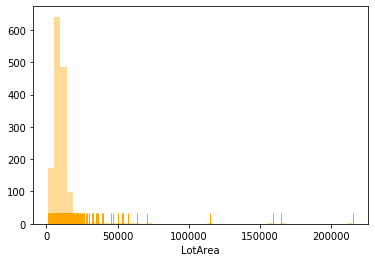

In [108]:
sns.distplot(price.LotArea, color = 'orange', kde=False, rug=True)

It looks like the lot area is highly skewed towards left, with large number of values clustered arround 12000.

## bivariate analysis

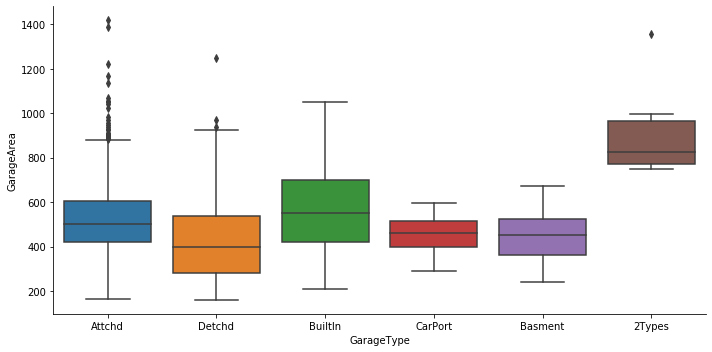

In [109]:
# relation between GarageType and GarageArea
sns.catplot(x = "GarageType", y = "GarageArea", kind = "box",  data = price, height = 5, aspect = 2)

From this plot we can see that garage "2Types" has the largest area, while "Detchd" has the smallest area.

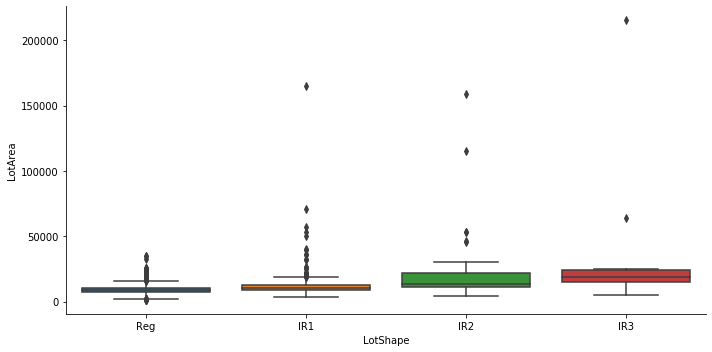

In [110]:
# relation between LotShape and LotArea
sns.catplot(x = "LotShape", y = "LotArea", kind = "box",  data = price, height = 5, aspect = 2)

From this plot we can see that lotshape "IR3" has the largest area, while "Reg" has the smallest area.

# pre-processing

In [111]:
# check missing value in the whole dataset
null_count = pd.DataFrame(price.isnull().sum(), columns= ["null_count"])
null_count[null_count["null_count"] != 0]

,null_count
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


### we can see from above dataframe that number of missing values in column "Alley", "PoolQC", "Fence" and  "MiscFeature" almost accounts for the total number of the dataset. Therefore, we can delete these 4 columns since these four columns cannot provide much information for our prediction.

In [112]:
# delete 4 columns above
price = price.drop(["Alley", "PoolQC", "Fence", "MiscFeature"], axis=1)
price.shape

(1460, 77)

In [113]:
# split the data into numeric data and categorical data to do preprocessing separately
price_nume = price.select_dtypes(include=['float64', 'int64'])
price_cate = price.select_dtypes(include=['object'])

## numeric data

In [114]:
# check missing value
price_nume.isna().sum().sum()

348

### we have 348 missing values in the numeric data

In [115]:
# impute the missing value
from sklearn.impute import SimpleImputer
imp_float = SimpleImputer(missing_values=np.nan, strategy='mean')
array_df_float = imp_float.fit_transform(price_nume)
price_nume = pd.DataFrame(array_df_float, columns = price_nume.columns)
price_nume.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.00,60.00,65.00,8450.00,7.00,5.00,2003.00,2003.00,196.00,706.00,...,0.00,61.00,0.00,0.00,0.00,0.00,0.00,2.00,2008.00,208500.00
1,2.00,20.00,80.00,9600.00,6.00,8.00,1976.00,1976.00,0.00,978.00,...,298.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,181500.00
2,3.00,60.00,68.00,11250.00,7.00,5.00,2001.00,2002.00,162.00,486.00,...,0.00,42.00,0.00,0.00,0.00,0.00,0.00,9.00,2008.00,223500.00
3,4.00,70.00,60.00,9550.00,7.00,5.00,1915.00,1970.00,0.00,216.00,...,0.00,35.00,272.00,0.00,0.00,0.00,0.00,2.00,2006.00,140000.00
4,5.00,60.00,84.00,14260.00,8.00,5.00,2000.00,2000.00,350.00,655.00,...,192.00,84.00,0.00,0.00,0.00,0.00,0.00,12.00,2008.00,250000.00


In [116]:
# check the effectiveness of imputation
price_nume.isna().sum().sum()

0

### we don't have missing value anymore in the data

In [117]:
# standardization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(price_nume)
price_nume = pd.DataFrame(X_scaled, columns=price_nume.columns)

In [118]:
price_nume.shape

(1460, 38)

## categorical data

### we have 6617 missing values in the numeric data

In [119]:
# impute the missing value
imp_category = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
array_df1 = imp_category.fit_transform(price_cate)
price_cate = pd.DataFrame(array_df1, columns=price_cate.columns)

In [120]:
# check the effectiveness of imputation
price_cate.isna().sum().sum()

0

### we don't have missing value anymore in the data

In [121]:
# check the dimension of data before encoding
price_cate.shape

(1460, 39)

In [122]:
# categorical varibles encoding
price_cate = pd.get_dummies(price_cate)

In [123]:
price_cate.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


## put two datasets together

In [124]:
price_new = pd.concat([price_nume, price_cate], axis = 1)
price_new.shape

(1460, 277)

In [125]:
# change the value of Id and SalePrice to its original value
price_new.Id = price.Id
price_new.SalePrice = price.SalePrice

In [128]:
price_new.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0.24,0.15,0.03,0.67,0.50,0.95,0.88,0.12,0.13,...,0,0,0,1,0,0,0,0,1,0
1,2,0.00,0.20,0.04,0.56,0.88,0.75,0.43,0.00,0.17,...,0,0,0,1,0,0,0,0,1,0
2,3,0.24,0.16,0.05,0.67,0.50,0.93,0.87,0.10,0.09,...,0,0,0,1,0,0,0,0,1,0
3,4,0.29,0.13,0.04,0.67,0.50,0.31,0.33,0.00,0.04,...,0,0,0,1,1,0,0,0,0,0
4,5,0.24,0.22,0.06,0.78,0.50,0.93,0.83,0.22,0.12,...,0,0,0,1,0,0,0,0,1,0


# modelling and evaluation

## split data into training/test set (6:4)

In [129]:
X = price_new.drop(["SalePrice"], axis=1)
y = price_new.SalePrice

In [130]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 66)

## 1) random forest

In [131]:
# choose the parameter candidates
param_grid_rf = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30],
    'max_features': [2,3,5],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [100, 200]
}

In [134]:
# do grid search
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    8.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [135]:
# find the best set of parmeters
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [136]:
# predict the result
y_pred_gridsearch_rf = best_grid_rf.predict(X_test)

In [138]:
# evaluate the model
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     GridSearchCV, RandomizedSearchCV)
from sklearn.metrics import mean_absolute_error, r2_score
mae_gridsearch_rf = mean_absolute_error(y_test, y_pred_gridsearch_rf)
r2_gridsearch_rf = r2_score(y_test, y_pred_gridsearch_rf)
print("The model performance for testing set from grid search")
print("--------------------------------------")
print('mean absoulte error is {}'.format(mae_gridsearch_rf))
print('R2 score is {}'.format(r2_gridsearch_rf))

The model performance for testing set from grid search
--------------------------------------
mean absoulte error is 24064.81849647835
R2 score is 0.7507146960651251


## 2) boosted tree

In [140]:
# choose the parameter candidates
param_grid_clf = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 200, 300, 400, 500]
}

In [141]:
# do grid search
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor()
grid_search_clf = GridSearchCV(estimator = clf, param_grid = param_grid_clf, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_clf.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   12.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [142]:
# find the best set of parmeters
best_grid_clf = grid_search_clf.best_estimator_
best_grid_clf

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [143]:
# predict the result
y_pred_gridsearch_clf = best_grid_clf.predict(X_test)

In [144]:
# evaluate the model
mae_gridsearch_clf = mean_absolute_error(y_test, y_pred_gridsearch_clf)
r2_gridsearch_clf = r2_score(y_test, y_pred_gridsearch_clf)
print("The model performance for testing set from grid search")
print("--------------------------------------")
print('mean absoulte error is {}'.format(mae_gridsearch_clf))
print('R2 score is {}'.format(r2_gridsearch_clf))

The model performance for testing set from grid search
--------------------------------------
mean absoulte error is 15585.230085256171
R2 score is 0.8982258237839897


We can see from above result that boosted trees performs better than random forest in terms of mean absoulte error and R2 score.